# Connect to Google Drive, Import Libraries and Datasets

## Connect to drive and check Directory

In [45]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [46]:
%cd /content/gdrive/Shareddrives/CSS2 - Research /Research Code

/content/gdrive/Shareddrives/CSS2 - Research /Research Code


In [47]:
!ls

Angie.ipynb  Harris.ipynb  Samuel.ipynb   Timothy.ipynb
desktop.ini  Isaac.ipynb   Test_data.csv  Train_data.csv


## Import necessary libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(rc={"figure.dpi":120, 'savefig.dpi':120})

# sklearn
import sklearn as sk
from sklearn import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
# DT
from sklearn.tree import DecisionTreeClassifier
# kNN
from sklearn.neighbors import KNeighborsClassifier
# RF
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn.svm import SVC
# NN (FNN - Binary classification)
import tensorflow as tf
from keras.layers import Dense, Dropout

## Intrusion Data

In [49]:
intrusion_data = pd.read_csv('Train_data.csv')
intrusion_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [50]:
intrusion_data['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [51]:
value_counts = intrusion_data['class'].value_counts()
total_values = len(intrusion_data['class'].dropna())
percentages = (value_counts / total_values) * 100
print(percentages)

normal     53.385996
anomaly    46.614004
Name: class, dtype: float64


# Preprocessing

In [36]:
total_rows = len(intrusion_data)

missing_values = intrusion_data.isna().sum()

percentage_missing = (missing_values / total_rows) * 100
percentage_missing = percentage_missing.round(2)
print(percentage_missing)

duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

## Testing Data

In [37]:
for column in intrusion_data.columns:
    print(f"Counts for {column}:")
    print(intrusion_data[column].value_counts())
    print("------------")

Counts for duration:
0        23168
1          374
2          165
3          102
4           75
         ...  
17025        1
12892        1
584          1
10774        1
322          1
Name: duration, Length: 758, dtype: int64
------------
Counts for protocol_type:
tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64
------------
Counts for service:
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64
------------
Counts for flag:
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: flag, dtype: int64
------------
Counts for src_bytes:
0        9866
8         738
1         480
44        467
45        416
         ... 
3724        1
44788       1
1205    

#Attribute Analyses and Input selection

## Intrusion data

In [80]:
intrusion_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
intrusion_data = pd.read_csv('Train_data.csv')

In [82]:
intrusion_data_right = intrusion_data
intrusion_data_right['class_label'] = (intrusion_data_right['class'] == 'anomaly').astype(int)
intrusion_data_right = intrusion_data_right.drop(['class'], axis=1)
intrusion_data_right

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [83]:
int_data_no_strings = intrusion_data_right.select_dtypes(exclude=['object'])
int_data_no_strings

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,334,0,0,0,0,0,0,1,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,0,0,0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,0,0,0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


#Splitting Data

In [135]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [136]:
top_10_info_gain = int_data_no_strings

In [137]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [138]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

In [139]:
y_train.value_counts()

0    10702
1     9451
Name: class_label, dtype: int64

# Decision Tree

## Hyper Parameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

# Create a decision tree classifier
DT_classifier = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DT_classifier, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)


## Train Decision Tree

In [ ]:
DT_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=40,
                                       min_samples_leaf=1, min_samples_split=2)
DT_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=40)

## Measure Decision Tree's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_DT = DT_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_DT)
print (score_test)

0.8783294268058811


In [ ]:
precision_test = precision_score(y_test, y_pred_DT, average='macro')
print (precision_test)

0.6850950519635571


In [ ]:
recall_test = recall_score(y_test, y_pred_DT, average='macro')
print (recall_test)

0.7392795414978082


In [ ]:
f1_test =  f1_score(y_test, y_pred_DT, average='macro')
print(f1_test)

0.7066922835868811


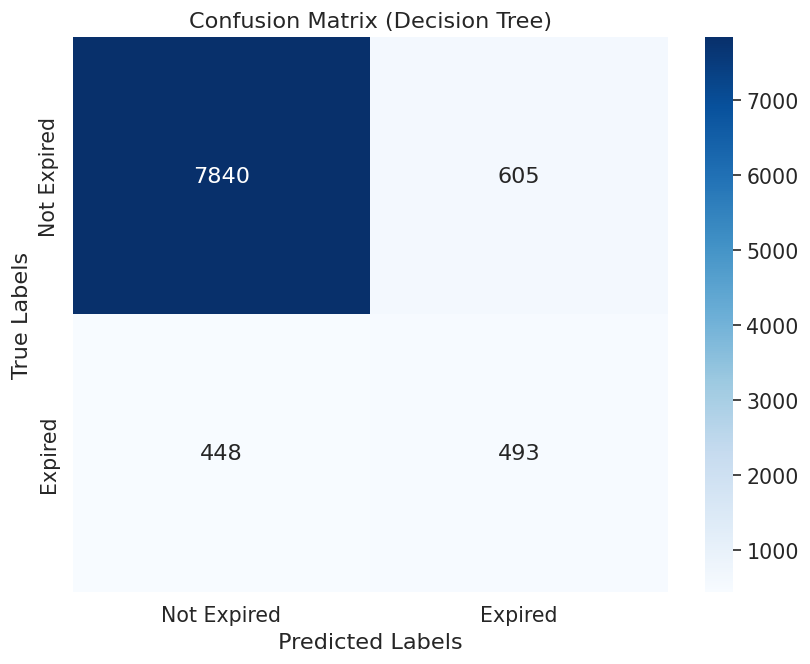

In [ ]:
mat = confusion_matrix(y_test, y_pred_DT)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_DT)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8445
           1       0.45      0.52      0.48       941

    accuracy                           0.89      9386
   macro avg       0.70      0.73      0.71      9386
weighted avg       0.90      0.89      0.89      9386



## ROC Curve

The AUC is 0.727
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.524 vs 0.072
0.125	0.525 vs 0.072
0.000	1.000 vs 1.000


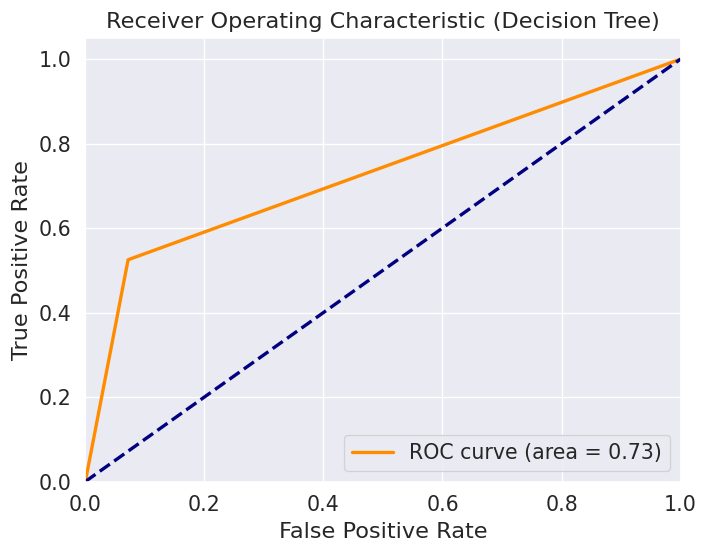

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

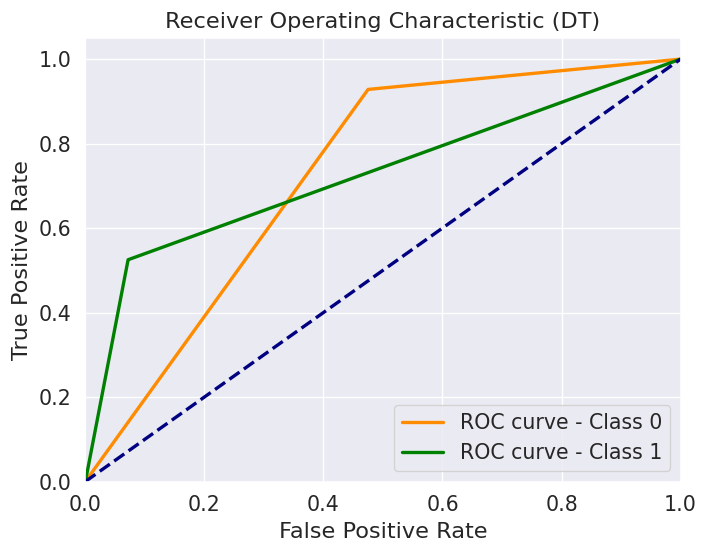

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (DT)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = DT_classifier.predict(future_sample_X)

In [ ]:
score_validate = accuracy_score(future_sample_y, solution_validate)
print (score_validate)

# K Nearest Neighbour

## Find best k value

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid (k values to explore)
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 19, 21, 23, 25, 27, 29, 31]}

# Create kNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']

print("Best k value:", best_k)

Best k value: 3


## Train kNN

In [ ]:
KNN_classifier = KNeighborsClassifier(n_neighbors=3)
KNN_classifier.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3)

## Measure kNN's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_KNN = KNN_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_KNN)
print (score_test)

0.8546771787769017


In [ ]:
precision_test = precision_score(y_test, y_pred_KNN, average='macro')
print (precision_test)

0.6691099301332915


In [ ]:
recall_test = recall_score(y_test, y_pred_KNN, average='macro')
print (recall_test)

0.7799599710321647


In [ ]:
f1_test =  f1_score(y_test, y_pred_KNN, average='macro')
print(f1_test)

0.7009046984662403


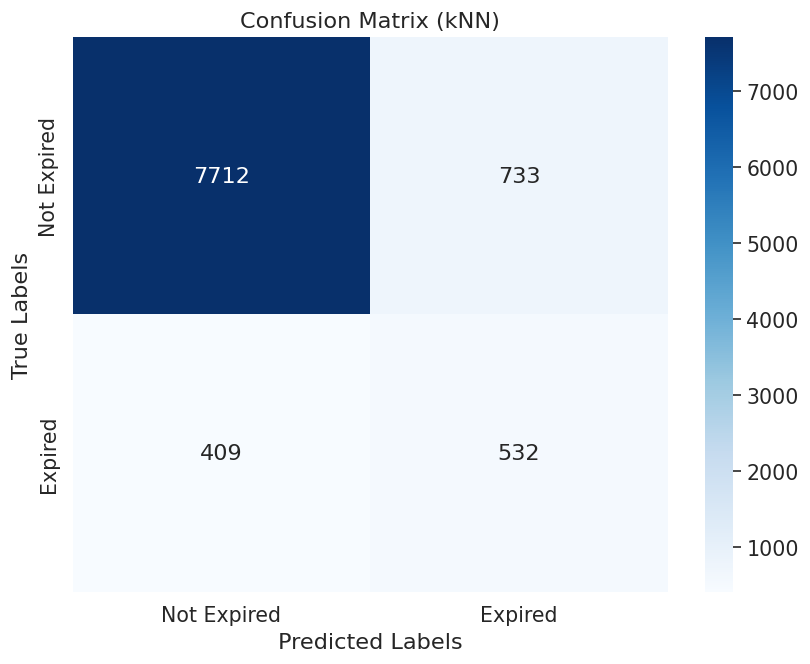

In [ ]:
mat = confusion_matrix(y_test, y_pred_DT)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (kNN)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_KNN)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.86      0.90      8445
           1       0.33      0.64      0.44       941

    accuracy                           0.84      9386
   macro avg       0.64      0.75      0.67      9386
weighted avg       0.89      0.84      0.86      9386



## ROC Curve

The AUC is 0.786
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.487 vs 0.069
0.667	0.634 vs 0.142
0.333	0.734 vs 0.230
0.000	1.000 vs 1.000


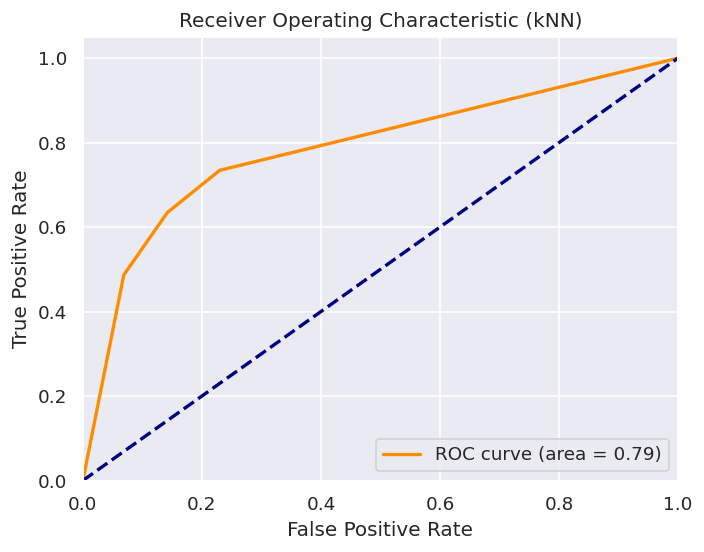

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = KNN_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (kNN)')
plt.legend(loc="lower right")
plt.show()

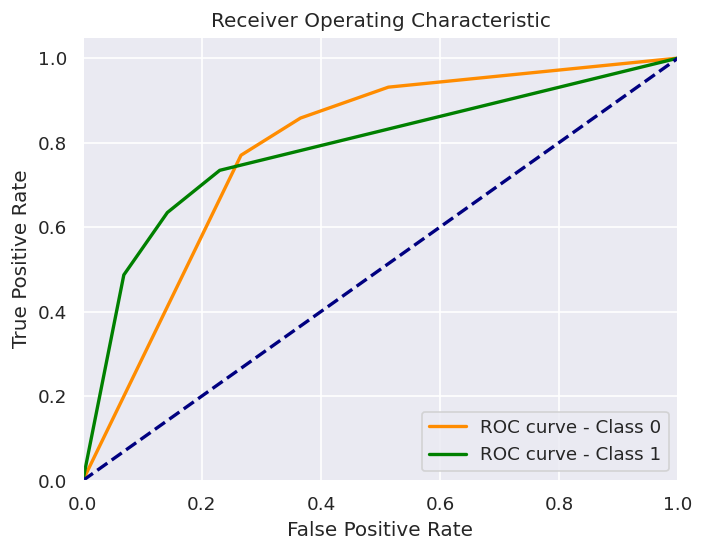

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = KNN_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (kNN)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = KNN_classifier.predict(future_sample_X)

In [ ]:
score_validate = accuracy_score(future_sample_y, solution_validate)
print (score_validate)

0.9


# Random Forrest

## Hyper Parameter optimization

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search
param_grid = {
    'criterion': ['entropy', 'gini'],
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree classifier
RF_classifier = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RF_classifier, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)


NameError: name 'X_train_resampled' is not defined

## Train Random Forrest

In [164]:
# RF_classifier = RandomForestClassifier(criterion='entropy', min_samples_leaf=1,
#                                        min_samples_split=2, n_estimators=2500)
RF_classifier = RandomForestClassifier(criterion='entropy')
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

### Cross Validation & KFold

In [165]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(RF_classifier, X_test, y_test, cv=kf, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cross_val_results)
print("Mean Accuracy:", cross_val_results.mean())

Cross-Validation Accuracy Scores: [0.99015748 0.99015748 0.98818898 0.98818898 0.98816568]
Mean Accuracy: 0.98897171877184


## Measure Random Forrest's performance

In [156]:
# Predict the class labels of samples in the test dataset
y_pred_RF = RF_classifier.predict(X_test)

In [157]:
score_test = accuracy_score(y_test, y_pred_RF)
print (score_test)

0.9948798739661284


In [158]:
precision_test = precision_score(y_test, y_pred_RF, average='macro')
print (precision_test)

0.9950973946691211


In [159]:
recall_test = recall_score(y_test, y_pred_RF, average='macro')
print (recall_test)

0.9945901417859475


In [160]:
f1_test =  f1_score(y_test, y_pred_RF, average='macro')
print(f1_test)

0.9948360116493644


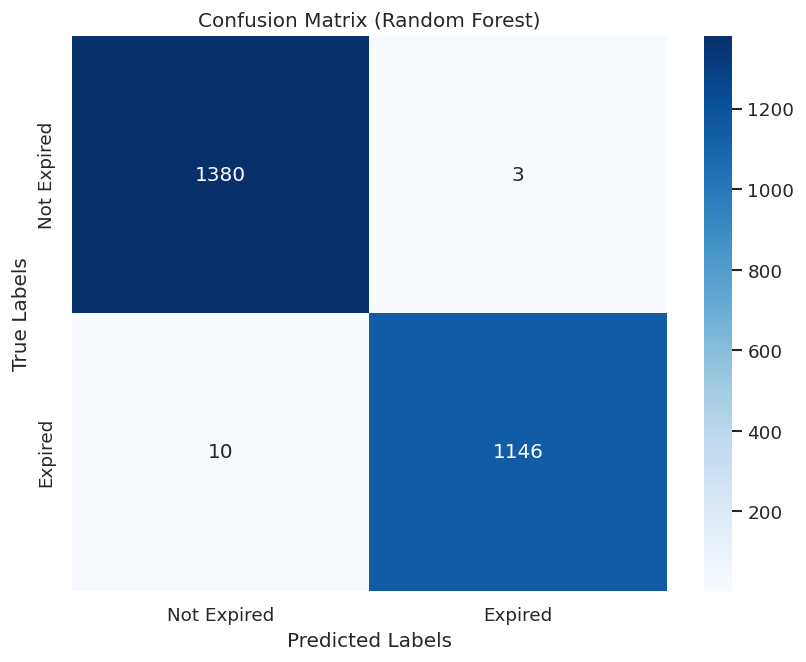

In [166]:
mat = confusion_matrix(y_test, y_pred_RF)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

In [163]:
report = classification_report(y_test, y_pred_RF)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1383
           1       1.00      0.99      0.99      1156

    accuracy                           0.99      2539
   macro avg       1.00      0.99      0.99      2539
weighted avg       0.99      0.99      0.99      2539



## ROC Curve

The AUC is 1.000
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.935 vs 0.000
0.990	0.954 vs 0.000
0.980	0.964 vs 0.000
0.970	0.971 vs 0.000
0.960	0.973 vs 0.000
0.930	0.978 vs 0.000
0.920	0.981 vs 0.000
0.890	0.982 vs 0.000
0.880	0.984 vs 0.000
0.870	0.984 vs 0.001
0.780	0.987 vs 0.001
0.760	0.988 vs 0.001
0.560	0.991 vs 0.001
0.440	0.991 vs 0.004
0.400	0.992 vs 0.004
0.390	0.992 vs 0.006
0.320	0.992 vs 0.009
0.300	0.993 vs 0.009
0.290	0.993 vs 0.009
0.270	0.995 vs 0.011
0.250	0.995 vs 0.012
0.230	0.995 vs 0.013
0.220	0.996 vs 0.013
0.200	0.997 vs 0.014
0.190	0.997 vs 0.015
0.180	0.997 vs 0.017
0.160	0.997 vs 0.017
0.130	0.997 vs 0.019
0.120	0.997 vs 0.020
0.110	0.998 vs 0.025
0.100	0.999 vs 0.027
0.090	0.999 vs 0.033
0.080	0.999 vs 0.035
0.070	0.999 vs 0.038
0.060	0.999 vs 0.043
0.050	0.999 vs 0.048
0.040	0.999 vs 0.059
0.030	1.000 vs 0.076
0.020	1.000 vs 0.100
0.010	1.000 vs 0.157
0.000	1.000 vs 1.000


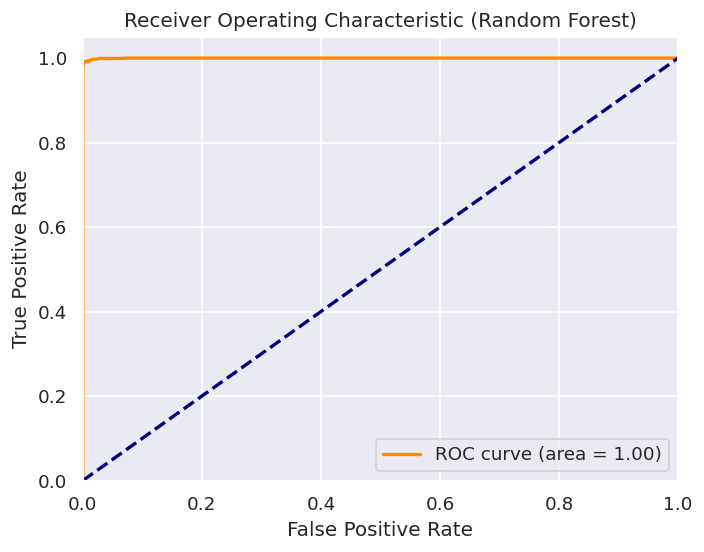

In [150]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

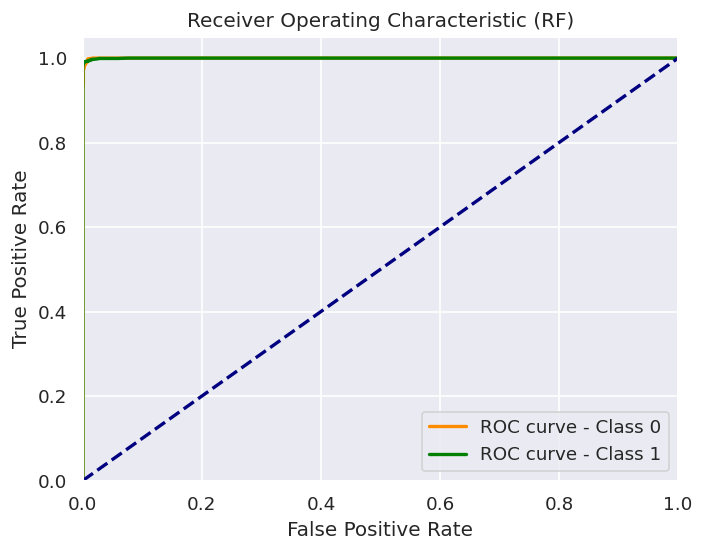

In [151]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RF)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [152]:
solution_validate = RF_classifier.predict(futureSample_X)

In [153]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.998


# Support Vector Machine

## Optimize parameters - too computationally expensive

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

param_dist = {
    'C': uniform(0.1, 10),  # Example range for C (adjust based on your dataset)
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
    'class_weight': [None, 'balanced']
}

randomized_search = RandomizedSearchCV(
    estimator=SVC(probability=True),
    param_distributions=param_dist,
    n_iter=3,  # Number of parameter settings that are sampled
    cv=5,       # Number of cross-validation folds
    n_jobs=-1,   # Use all available CPU cores for parallelism
    random_state=42
)

randomized_search.fit(X_train_resampled, y_train_resampled)
best_params = randomized_search.best_params_
best_classifier = randomized_search.best_estimator_

NameError: name 'X_train_resampled' is not defined

## Train SVM

In [103]:
SVM_classifier = SVC(probability=True)
SVM_classifier.fit(X_train_resampled, y_train_resampled)

NameError: name 'X_train_resampled' is not defined

## Measure SVM's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_SVM = SVM_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_SVM)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_SVM, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_SVM, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_SVM, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_SVM)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (SVM)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_SVM)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = SVM_classifier.predict(future_sample_X)

In [ ]:
score_validate = accuracy_score(future_sample_y, solution_validate)
print (score_validate)

# Neural Network

In [ ]:
import tensorflow as tf
from keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model

input_dim   = X_train.shape[1]

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("Epoch {}: Loss - {:.4f}, Accuracy - {:.4f}".format(epoch+1, logs['loss'], logs['accuracy']))

## Hyper Parameter Tuning

In [ ]:
import kerastuner
from kerastuner.tuners import RandomSearch

epochNo = 10
batchSize = 100

def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(input_dim)))
    model.add(Dense(units=hp.Int('units1', min_value=2048, max_value=4196, step=256), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_rate1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units2', min_value=1024, max_value=2048, step=128), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_rate2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units3', min_value=512, max_value=1024, step=64), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_rate3', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    directory='my_dir',  # Directory to save optimization logs and checkpoints
    project_name='opt_2'
)

tuner.search(X_train_resampled, y_train_resampled, epochs=epochNo, batch_size=batchSize, validation_data=(X_test, y_test))

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hyperparameters_list = best_hps.values
print("Best Hyperparameters:", best_hyperparameters_list)

Best Hyperparameters: {'units1': 1792, 'dropout_rate1': 0.2, 'units2': 896, 'dropout_rate2': 0.2, 'units3': 320, 'dropout_rate3': 0.30000000000000004}


In [ ]:
predictions = model.predict(X_test)
y_preds_FNN = (predictions > 0.5)*1

294/294 [==============================] - 1s 3ms/step


## Using a FNN

In [ ]:
n_neurons_1   = 3328
n_neurons_2   = 2048
n_neurons_3   = 960
epochNo      =  100
batchSize = 100

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(input_dim))) # tf.keras.Input() is used to instantiate a Keras tensor.
model.add(Dense(n_neurons_1, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(n_neurons_2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_neurons_3, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation=tf.keras.activations.sigmoid))

callbacks = [CustomCallback()]

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_resampled, y_train_resampled, epochs=epochNo, batch_size=batchSize, verbose=3, callbacks=callbacks)

predictions = model.predict(X_test)
y_preds_FNN = (predictions > 0.5)*1
scores = model.evaluate(X_test, y_test)
print('The evaluation scores are {}'.format(scores))
model.save("model.h5")
loaded_model = load_model ('model.h5')
loaded_model.summary()

## Measuring the perfomance of the FNN

In [ ]:
loaded_model = load_model ('model.h5')
predictions = loaded_model.predict(X_test)
y_preds_FNN = (predictions > 0.5)*1

294/294 [==============================] - 16s 53ms/step


In [ ]:
score_test = accuracy_score(y_test, y_preds_FNN)
print (score_test)

0.9284040059663329


In [ ]:
precision_test = precision_score(y_test, y_preds_FNN, average='macro')
print (precision_test)

0.816721182997243


In [ ]:
recall_test = recall_score(y_test, y_preds_FNN, average='macro')
print (recall_test)

0.7515259392367567


In [ ]:
f1_test =  f1_score(y_test, y_preds_FNN, average='macro')
print(f1_test)

0.7791555702768245


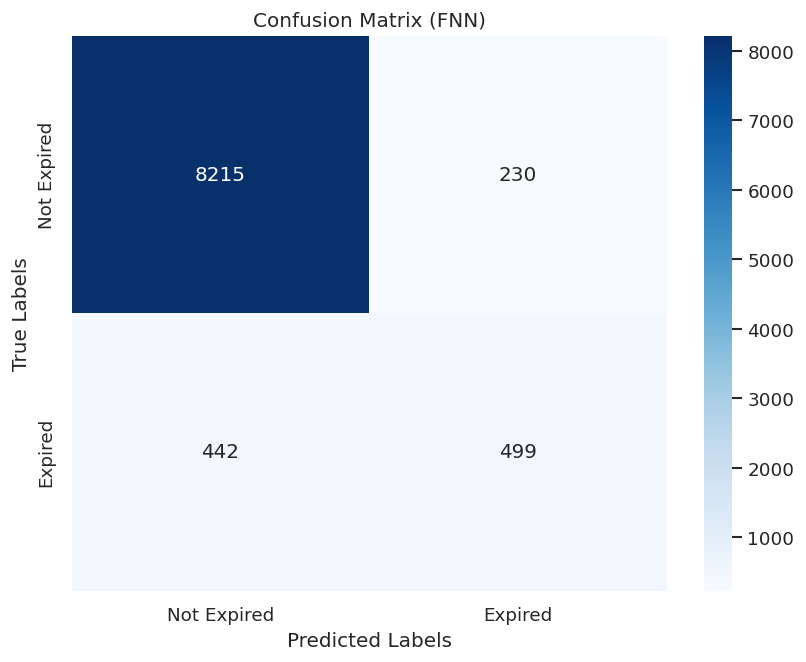

In [ ]:
mat = confusion_matrix(y_test, y_preds_FNN)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (FNN)")
plt.show()

In [ ]:
report = classification_report(y_test, y_preds_FNN)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8445
           1       0.68      0.53      0.60       941

    accuracy                           0.93      9386
   macro avg       0.82      0.75      0.78      9386
weighted avg       0.92      0.93      0.92      9386



## ROC Curve

The AUC is 0.914


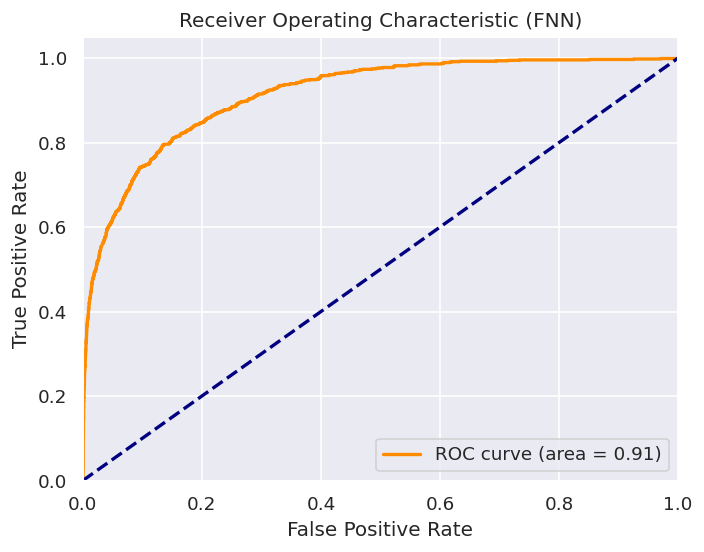

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of the positive class (class 1) using the predict method.
y_probs = predictions
# The predicted probabilities for class 1 are already in y_probs.
# Calculate ROC curve and AUC.
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

print('The AUC is {:.3f}'.format(auc))

# Plot ROC curve.
plt.figure()
lw = 2  # line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (FNN)')
plt.legend(loc='lower right')
plt.show()

294/294 [==============================] - 7s 24ms/step


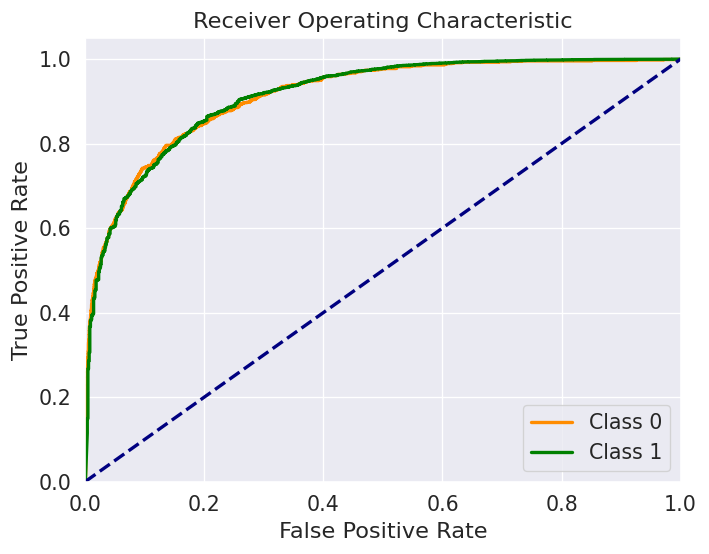

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get probabilities from the model
predictions = loaded_model.predict(X_test)

# Ensure predictions is a 2D array with shape (n_samples, n_classes)
if predictions.shape[1] == 1:
    # If predictions have only one column, assume binary classification and create a 2D array
    positive_probs = predictions[:, 0]  # Probabilities for the positive class
    negative_probs = 1 - positive_probs  # Probabilities for the negative class
else:
    # If predictions already have multiple columns, assume they represent probabilities for each class
    positive_probs = predictions[:, 1]  # Probabilities for the positive class
    negative_probs = predictions[:, 0]  # Probabilities for the negative class

# Calculate ROC curve and AUC score for positive class
fpr_positive, tpr_positive, _ = roc_curve(y_test, positive_probs, pos_label=1)
auc_positive = roc_auc_score(y_test, positive_probs)

# Calculate ROC curve and AUC score for negative class
fpr_negative, tpr_negative, _ = roc_curve(y_test, negative_probs, pos_label=0)
auc_negative = roc_auc_score(y_test, negative_probs)

# Plot ROC curves for both positive and negative classes on the same graph
plt.figure()
lw = 2
plt.plot(fpr_positive, tpr_positive, color='darkorange', lw=lw, label='Class 0')
plt.plot(fpr_negative, tpr_negative, color='green', lw=lw, label='Class 1')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Measuring performance on small unseen set

In [ ]:
predictions_val = loaded_model.predict(future_sample_X)
y_preds_val = (predictions_val > 0.5)*1     # threshold is 0.5
loss, accuracy = model.evaluate(future_sample_X, future_sample_y)
print('Loss: %.4f, Accuracy: %.2f%%' % (loss, accuracy*100))

2/2 [==============================] - 0s 12ms/step - loss: 0.1544 - accuracy: 0.9600
Loss: 0.1544, Accuracy: 96.00%


# Naive Bayes - Gaussian

## Hyper parameter optimisation

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a Gaussian Naive Bayes classifier
GNB_classifier = GaussianNB()

# Instantiate GridSearchCV with the classifier, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(estimator=GNB_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'var_smoothing': 1e-09}
Best Accuracy Score:  0.7224971212233731


## Train Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_GNB = GNB_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_GNB)
print (score_test)

0.8992115917323673


In [ ]:
precision_test = precision_score(y_test, y_pred_GNB, average='macro')
print (precision_test)

0.720279416177506


In [ ]:
recall_test = recall_score(y_test, y_pred_GNB, average='macro')
print (recall_test)

0.7173618884209825


In [ ]:
f1_test =  f1_score(y_test, y_pred_GNB, average='macro')
print(f1_test)

0.7188064657352111


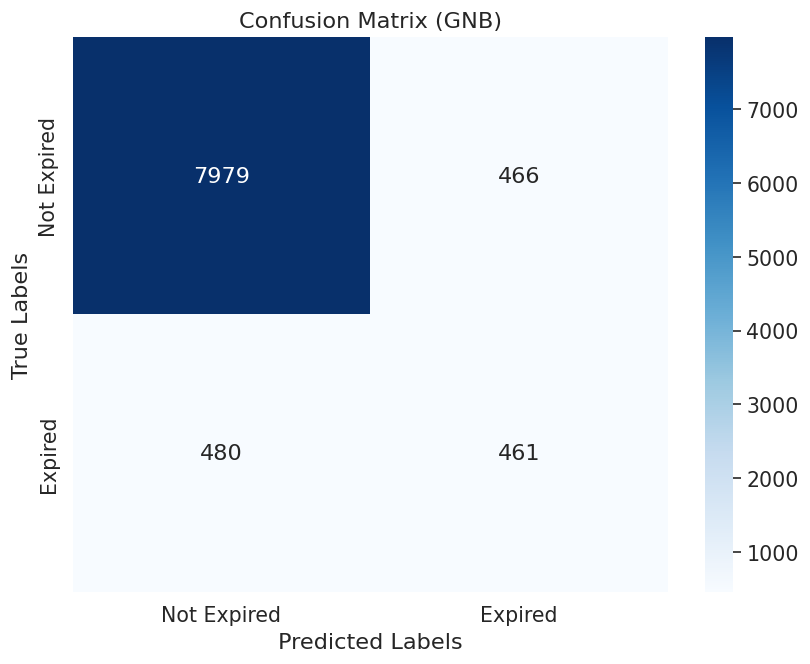

In [ ]:
mat = confusion_matrix(y_test, y_pred_GNB)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (GNB)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_GNB)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8445
           1       0.50      0.49      0.49       941

    accuracy                           0.90      9386
   macro avg       0.72      0.72      0.72      9386
weighted avg       0.90      0.90      0.90      9386



## ROC Curve

The AUC is 0.849
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.181 vs 0.007
1.000	0.185 vs 0.008
1.000	0.187 vs 0.008
1.000	0.191 vs 0.009
1.000	0.193 vs 0.009
1.000	0.196 vs 0.009
1.000	0.196 vs 0.009
1.000	0.197 vs 0.009
1.000	0.199 vs 0.009
1.000	0.200 vs 0.009
1.000	0.202 vs 0.009
1.000	0.202 vs 0.009
1.000	0.203 vs 0.009
1.000	0.203 vs 0.009
1.000	0.204 vs 0.009
1.000	0.204 vs 0.010
1.000	0.207 vs 0.010
1.000	0.207 vs 0.010
1.000	0.215 vs 0.010
1.000	0.215 vs 0.010
1.000	0.216 vs 0.010
1.000	0.216 vs 0.011
1.000	0.220 vs 0.011
1.000	0.220 vs 0.011
1.000	0.222 vs 0.011
1.000	0.222 vs 0.011
1.000	0.227 vs 0.011
1.000	0.227 vs 0.011
1.000	0.228 vs 0.011
1.000	0.228 vs 0.011
1.000	0.232 vs 0.011
1.000	0.232 vs 0.011
1.000	0.234 vs 0.011
1.000	0.234 vs 0.012
1.000	0.235 vs 0.012
1.000	0.235 vs 0.012
1.000	0.236 vs 0.012
1.000	0.236 vs 0.012
1.000	0.238 vs 0.012
1.000	0.238 vs 0.012
1.000	0.239 vs 0.012
1.000	0.239 vs 0.013
1.000	0.244 vs 0.013
1.000	0.244 vs 0.013
1.000	0.247 vs 0.

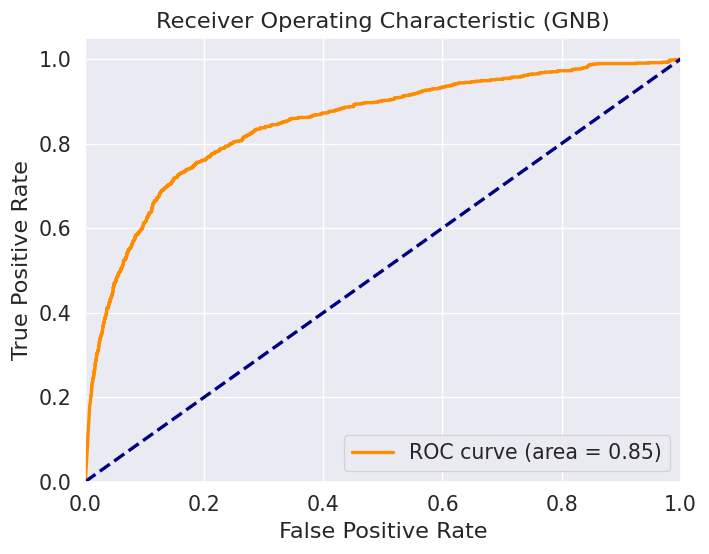

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = GNB_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GNB)')
plt.legend(loc="lower right")
plt.show()

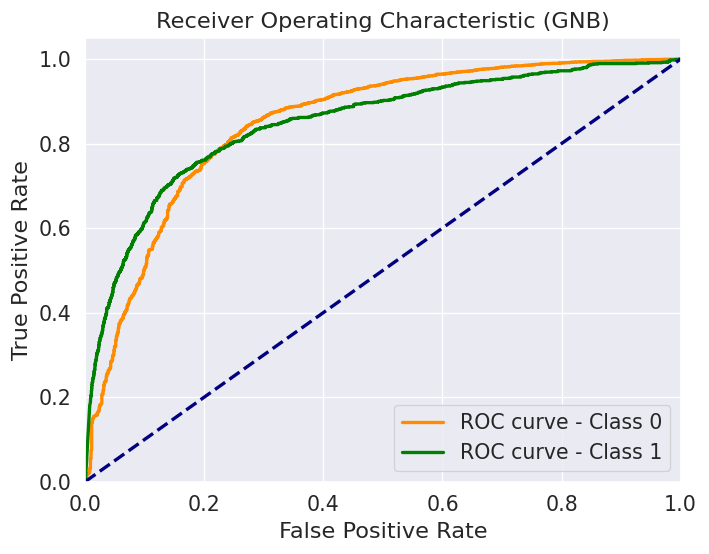

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = GNB_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GNB)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = GNB_classifier.predict(future_sample_X)

In [ ]:
score_validate = accuracy_score(future_sample_y, solution_validate)
print (score_validate)

0.88


# Quadratic Discrimination Analysis

## Hyper parameter optimisation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Define the parameter grid to search
param_grid = {
    'reg_param': [0.1, 0.01, 0.001, 0.0001]  # Regularization parameter to avoid singular matrices
}

# Create a Quadratic Discriminant Analysis classifier
QDA_classifier = QuadraticDiscriminantAnalysis()

# Instantiate GridSearchCV with the classifier, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(estimator=QDA_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'reg_param': 0.1}
Best Accuracy Score:  0.7033173422035229


## Train QDA

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA_classifier = QuadraticDiscriminantAnalysis(reg_param = 0.1)
QDA_classifier.fit(X_train_resampled, y_train_resampled)

QuadraticDiscriminantAnalysis(reg_param=0.1)

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_QDA = QDA_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_QDA)
print (score_test)

0.8964415086298743


In [ ]:
precision_test = precision_score(y_test, y_pred_QDA, average='macro')
print (precision_test)

0.7117229869041035


In [ ]:
recall_test = recall_score(y_test, y_pred_QDA, average='macro')
print (recall_test)

0.7044910840853708


In [ ]:
f1_test =  f1_score(y_test, y_pred_QDA, average='macro')
print(f1_test)

0.7080148384101133


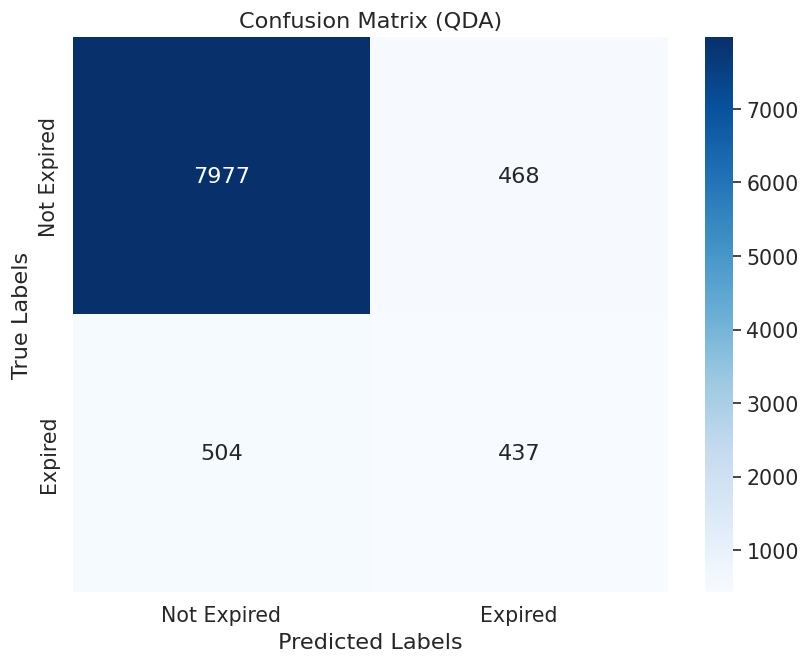

In [ ]:
mat = confusion_matrix(y_test, y_pred_QDA)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (QDA)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_QDA)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8445
           1       0.48      0.46      0.47       941

    accuracy                           0.90      9386
   macro avg       0.71      0.70      0.71      9386
weighted avg       0.89      0.90      0.90      9386



## ROC Curve

The AUC is 0.842
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.166 vs 0.008
1.000	0.167 vs 0.008
1.000	0.169 vs 0.008
1.000	0.169 vs 0.008
1.000	0.173 vs 0.008
1.000	0.174 vs 0.008
1.000	0.174 vs 0.009
1.000	0.175 vs 0.009
1.000	0.175 vs 0.009
1.000	0.182 vs 0.009
1.000	0.182 vs 0.009
1.000	0.189 vs 0.009
1.000	0.189 vs 0.009
1.000	0.190 vs 0.009
1.000	0.190 vs 0.009
1.000	0.193 vs 0.009
1.000	0.193 vs 0.009
1.000	0.199 vs 0.009
1.000	0.199 vs 0.009
1.000	0.202 vs 0.009
1.000	0.202 vs 0.010
1.000	0.203 vs 0.010
1.000	0.203 vs 0.010
1.000	0.205 vs 0.010
1.000	0.205 vs 0.010
1.000	0.206 vs 0.010
1.000	0.206 vs 0.011
1.000	0.208 vs 0.011
1.000	0.208 vs 0.011
1.000	0.213 vs 0.011
1.000	0.213 vs 0.011
1.000	0.217 vs 0.011
1.000	0.217 vs 0.011
1.000	0.218 vs 0.011
1.000	0.218 vs 0.011
1.000	0.220 vs 0.011
1.000	0.220 vs 0.012
1.000	0.221 vs 0.012
1.000	0.221 vs 0.012
1.000	0.222 vs 0.012
1.000	0.222 vs 0.012
1.000	0.223 vs 0.012
1.000	0.223 vs 0.012
1.000	0.225 vs 0.012
1.000	0.225 vs 0.

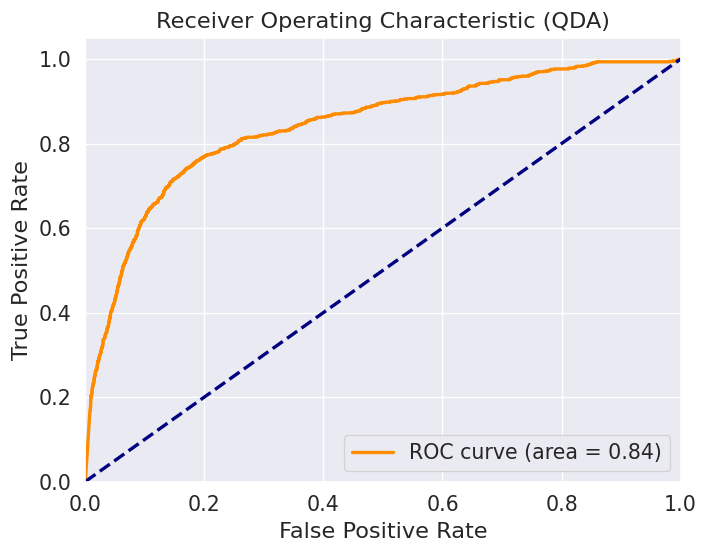

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = QDA_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (QDA)')
plt.legend(loc="lower right")
plt.show()

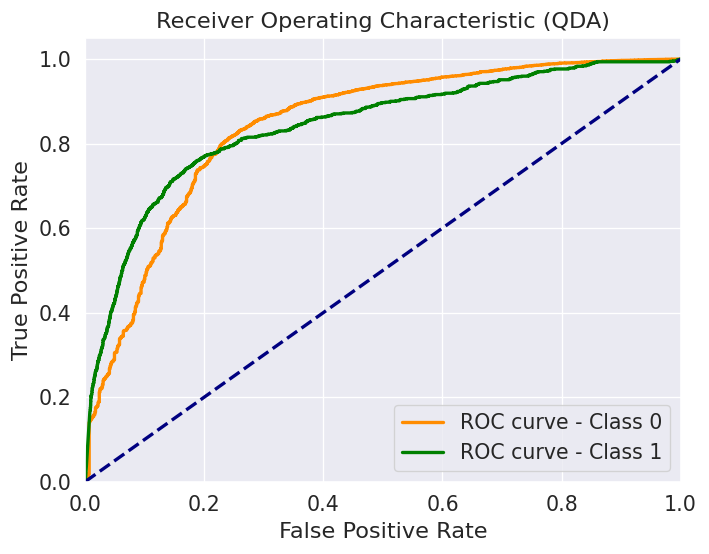

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = QDA_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (QDA)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = QDA_classifier.predict(future_sample_X)

In [ ]:
score_validate = accuracy_score(future_sample_y, solution_validate)
print (score_validate)

0.88


# MLP Classifier

## Hyper parameter optimisation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(5, 2), (10, 5), (20, 10)],  # Different combinations of hidden layer sizes
    'alpha': [1e-5, 1e-4, 1e-3],  # Regularization parameter
    'solver': ['lbfgs', 'sgd', 'adam']  # Optimization algorithm
}

# Create an MLPClassifier
MLP_classifier = MLPClassifier(random_state=1)

# Instantiate GridSearchCV with the classifier, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(estimator=MLP_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'alpha': 0.001, 'hidden_layer_sizes': (20, 10), 'solver': 'adam'}
Best Accuracy Score:  0.9291146019805672


## Training

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP_classifier = MLPClassifier(solver='adam', alpha= 0.001, hidden_layer_sizes=(400, 200), random_state=1)
MLP_classifier.fit(X_train_resampled, y_train_resampled)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(400, 200), random_state=1)

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_MLP = MLP_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_MLP)
print (score_test)

0.9212657148945238


In [ ]:
precision_test = precision_score(y_test, y_pred_MLP, average='macro')
print (precision_test)

0.7809710762024225


In [ ]:
recall_test = recall_score(y_test, y_pred_MLP, average='macro')
print (recall_test)

0.7886355356815904


In [ ]:
f1_test =  f1_score(y_test, y_pred_MLP, average='macro')
print(f1_test)

0.7847312580212679


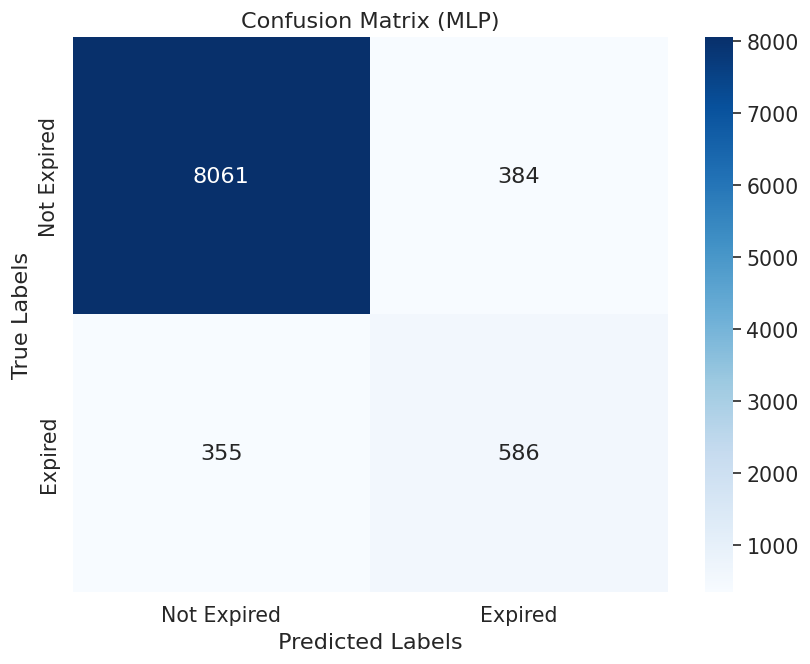

In [ ]:
mat = confusion_matrix(y_test, y_pred_MLP)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (MLP)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_MLP)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      8445
           1       0.60      0.62      0.61       941

    accuracy                           0.92      9386
   macro avg       0.78      0.79      0.78      9386
weighted avg       0.92      0.92      0.92      9386



The AUC is 0.900
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.002 vs 0.000
1.000	0.010 vs 0.000
1.000	0.010 vs 0.000
1.000	0.015 vs 0.000
1.000	0.015 vs 0.000
1.000	0.021 vs 0.000
1.000	0.021 vs 0.000
1.000	0.023 vs 0.000
1.000	0.023 vs 0.001
1.000	0.029 vs 0.001
1.000	0.029 vs 0.001
1.000	0.034 vs 0.001
1.000	0.034 vs 0.001
1.000	0.043 vs 0.001
1.000	0.043 vs 0.001
1.000	0.049 vs 0.001
1.000	0.049 vs 0.001
1.000	0.063 vs 0.001
1.000	0.063 vs 0.001
1.000	0.067 vs 0.001
1.000	0.067 vs 0.001
1.000	0.070 vs 0.001
1.000	0.070 vs 0.001
0.999	0.095 vs 0.001
0.999	0.095 vs 0.002
0.999	0.104 vs 0.002
0.999	0.104 vs 0.002
0.998	0.114 vs 0.002
0.998	0.114 vs 0.002
0.998	0.119 vs 0.002
0.998	0.119 vs 0.002
0.998	0.125 vs 0.002
0.998	0.125 vs 0.002
0.998	0.133 vs 0.002
0.998	0.133 vs 0.002
0.997	0.137 vs 0.002
0.997	0.137 vs 0.002
0.997	0.152 vs 0.002
0.997	0.152 vs 0.002
0.995	0.166 vs 0.002
0.995	0.166 vs 0.002
0.993	0.185 vs 0.002
0.993	0.185 vs 0.003
0.991	0.198 vs 0.003
0.991	0.198 vs 0.

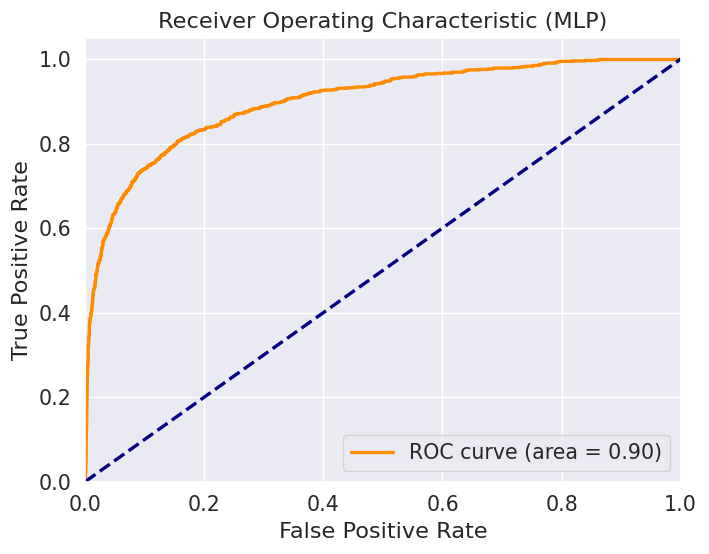

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = MLP_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (MLP)')
plt.legend(loc="lower right")
plt.show()

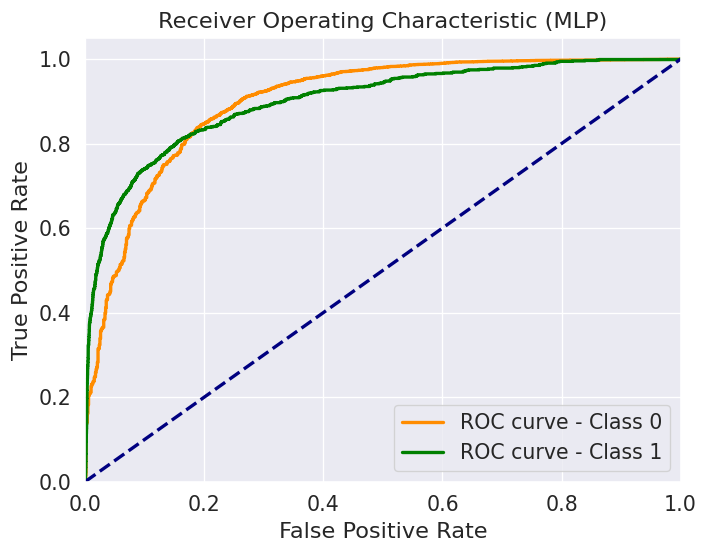

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = MLP_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (MLP)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = MLP_classifier.predict(future_sample_X)

In [ ]:
score_validate = accuracy_score(future_sample_y, solution_validate)
print (score_validate)

0.92


# Run Classifiers

In [ ]:
# # DT
# DT_predictions = DT_classifier.predict(testing_data_set)
# DT_predictions_df = pd.DataFrame({'Predicted-ExpiredHospital': DT_predictions})

# # kNN
# KNN_predictions = KNN_classifier.predict(testing_data_set)
# KNN_predictions_df = pd.DataFrame({'Predicted-ExpiredHospital': KNN_predictions})

# RF
RF_predictions = RF_classifier.predict(testing_data_set_fs)
RF_predictions_df = pd.DataFrame({'Predicted-ExpiredHospital': RF_predictions})

# # # SVM
# SVM_predictions = SVM_classifier.predict(testing_data_set)
# SVM_predictions_df = pd.DataFrame({'Predicted-ExpiredHospital': SVM_predictions})

In [ ]:
# FNN
FNN_predictions = loaded_model.predict(testing_data_set)
FNN_predictions_flat = np.array(FNN_predictions).flatten()

# Apply threshold to convert probabilities to binary predictions
threshold = 0.5
binary_predictions = (FNN_predictions_flat > threshold).astype(int)

# Create a dataframe for binary predictions
FNN_predictions_df = pd.DataFrame({'Predicted-ExpiredHospital': binary_predictions})

369/369 [==============================] - 7s 19ms/step


In [ ]:
DT_predictions_df

,Predicted-ExpiredHospital
0,0
1,1
2,0
3,0
4,0
...,...
11791,0
11792,1
11793,0
11794,0


In [ ]:
DT_predictions_df['row ID'] = ['Row' + str(i) for i in range(len(DT_predictions_df))]
DT_predictions_df = DT_predictions_df[['row ID', 'Predicted-ExpiredHospital']]
DT_predictions_df

,row ID,Predicted-ExpiredHospital
0,Row0,0
1,Row1,1
2,Row2,0
3,Row3,0
4,Row4,0
...,...,...
11791,Row11791,0
11792,Row11792,1
11793,Row11793,0
11794,Row11794,0


In [ ]:
KNN_predictions_df['row ID'] = ['Row' + str(i) for i in range(len(KNN_predictions_df))]
KNN_predictions_df = KNN_predictions_df[['row ID', 'Predicted-ExpiredHospital']]
KNN_predictions_df

,row ID,Predicted-ExpiredHospital
0,Row0,0
1,Row1,0
2,Row2,0
3,Row3,0
4,Row4,0
...,...,...
11791,Row11791,0
11792,Row11792,0
11793,Row11793,0
11794,Row11794,0


In [ ]:
RF_predictions_df['row ID'] = ['Row' + str(i) for i in range(len(RF_predictions_df))]
RF_predictions_df = RF_predictions_df[['row ID', 'Predicted-ExpiredHospital']]
RF_predictions_df

,row ID,Predicted-ExpiredHospital
0,Row0,0
1,Row1,1
2,Row2,0
3,Row3,0
4,Row4,0
...,...,...
11791,Row11791,0
11792,Row11792,1
11793,Row11793,0
11794,Row11794,1


In [ ]:
SVM_predictions_df['row ID'] = ['Row' + str(i) for i in range(len(SVM_predictions_df))]
SVM_predictions_df = SVM_predictions_df[['row ID', 'Predicted-ExpiredHospital']]
SVM_predictions_df

,row ID,Predicted-ExpiredHospital
0,Row0,0
1,Row1,1
2,Row2,0
3,Row3,0
4,Row4,0
...,...,...
11791,Row11791,0
11792,Row11792,1
11793,Row11793,0
11794,Row11794,1


In [ ]:
FNN_predictions_df['row ID'] = ['Row' + str(i) for i in range(len(FNN_predictions_df))]
FNN_predictions_df = FNN_predictions_df[['row ID', 'Predicted-ExpiredHospital']]
FNN_predictions_df

,row ID,Predicted-ExpiredHospital
0,Row0,0
1,Row1,0
2,Row2,0
3,Row3,0
4,Row4,0
...,...,...
11791,Row11791,0
11792,Row11792,0
11793,Row11793,0
11794,Row11794,0


## Turn Prediction Dataframes into CSV files

In [ ]:
# DT_predictions_df.to_csv('DT.csv', index=False)
# KNN_predictions_df.to_csv('KNN.csv', index=False)
RF_predictions_df.to_csv('RF.csv', index=False)
# SVM_predictions_df.to_csv('SVM.csv', index=False)
# FNN_predictions_df.to_csv('FNN.csv', index=False)